In [51]:
import warnings
warnings.filterwarnings('ignore')  

In [52]:
import tensorflow as tf
print(tf.__version__)

1.4.0


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
print(sklearn.__version__)

0.19.1


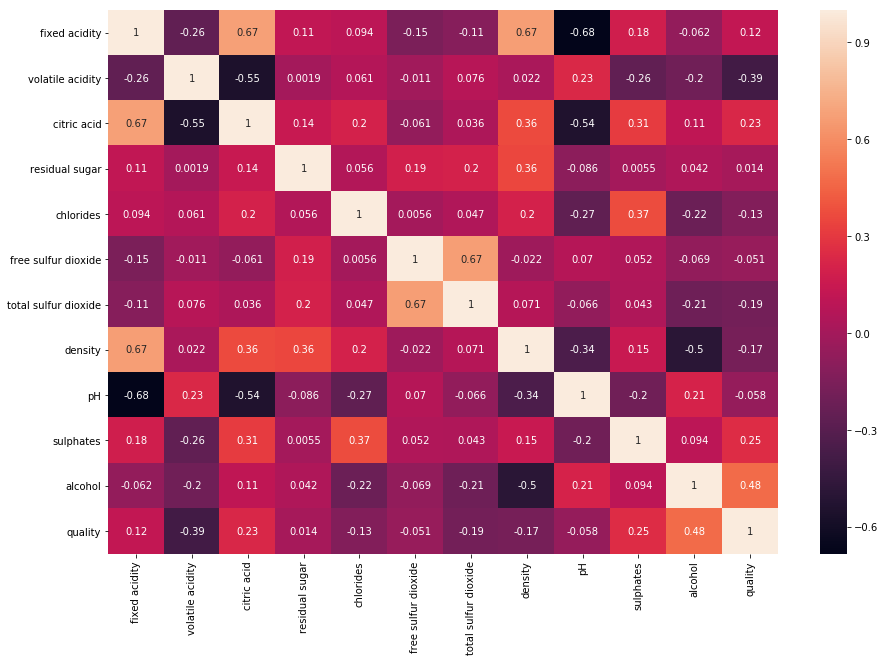

In [54]:
Class_type = 'multi-class'

if Class_type == 'multi-class':
    dataset = pd.read_csv("winequality-red.csv")
    avg = 'weighted'
elif Class_type == 'binary':
    dataset = pd.read_csv("winequality-red-binary.csv")
    avg = 'binary'

    
X_cols = list(dataset.columns)
#del(X_cols[-1])

col1 = 0
col2 = 11

X = dataset.iloc[:,col1:col2].values
y = dataset.iloc[:,-1].values

corr = dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [55]:
from sklearn.model_selection import train_test_split
X_train_old, X_test_old, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### Classifiers and Their Parameter Grids For the Grid Search Algorithm ###

cfs = [LogisticRegression(),
       KNeighborsClassifier(),
       SVC(),
       DecisionTreeClassifier(),
       RandomForestClassifier()
       ]

cf_title = ['Logistic Regression',
            'K-Nearest Neighbors',
            'Kernel SVM', 
            'Decision Tree', 
            'Random Forest']

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [58]:
#Use extratrees and selectfrommodel to isolate the most important features for classification
feature_list = []

print('Old shape of dataset = ')
print(X_train_old.shape)

featmodel = ExtraTreesClassifier(n_estimators=100)
featmodel = featmodel.fit(X_train_old,y_train)
print("feature importances: ", featmodel.feature_importances_)
model = SelectFromModel(featmodel,prefit=True)
feature_idx = model.get_support(indices = True)
for i in feature_idx:
    feature_list.append(X_cols[i])
print('Features: ', X_cols)

X_train = model.transform(X_train_old)
X_test = model.transform(X_test_old)

print('New shape of dataset = ', X_train.shape)
print('Selected Features:', feature_list) 

Old shape of dataset = 
(1119, 11)
feature importances:  [0.07741355 0.09922603 0.07860481 0.0789827  0.07772276 0.07434074
 0.10210482 0.08127506 0.07787682 0.10520031 0.1472524 ]
Features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
New shape of dataset =  (1119, 4)
Selected Features: ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']


While the correlation between the selected features and the target variable are not optimal (as we would prefer a correlation value closer to 1), they assist in filtering out noisy data by calculating feature importance. 

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

acc=[]
ps=[]
rs=[]
f_1=[]

for classifier in range(0, len(cfs)):
    cfs[classifier].fit(X_train, y_train)
    y_pred = cfs[classifier].predict(X_test)
    
    acc.append(accuracy_score(y_test, y_pred))
    ps.append(precision_score(y_test, y_pred, average = avg))
    rs.append(recall_score(y_test, y_pred, average = avg))
    f_1.append(f1_score(y_test, y_pred, average = avg))
    print('### Accuracy/Precision/Recall/F1 ###')
    print('\n')
    print('The accuracy for the '+cf_title[classifier]+' classifier was: '+str(acc[classifier])) 
    print('The precision for the '+cf_title[classifier]+' classifier was: '+str(ps[classifier])) 
    print('The recall for the '+cf_title[classifier]+' classifier was: '+str(rs[classifier]))
    print('The f1 score for the '+cf_title[classifier]+' classifier was: '+str(f_1[classifier]))
    print('\n')
    print('==================================================================================')
    
    y_pred = None

### Accuracy/Precision/Recall/F1 ###


The accuracy for the Logistic Regression classifier was: 0.61875
The precision for the Logistic Regression classifier was: 0.5791026933416047
The recall for the Logistic Regression classifier was: 0.61875
The f1 score for the Logistic Regression classifier was: 0.593448761907583


### Accuracy/Precision/Recall/F1 ###


The accuracy for the K-Nearest Neighbors classifier was: 0.625
The precision for the K-Nearest Neighbors classifier was: 0.6023885759597506
The recall for the K-Nearest Neighbors classifier was: 0.625
The f1 score for the K-Nearest Neighbors classifier was: 0.6133220278649186


### Accuracy/Precision/Recall/F1 ###


The accuracy for the Kernel SVM classifier was: 0.6354166666666666
The precision for the Kernel SVM classifier was: 0.6027374692288855
The recall for the Kernel SVM classifier was: 0.6354166666666666
The f1 score for the Kernel SVM classifier was: 0.614222721870399


### Accuracy/Precision/Recall/F1 ###


The accuracy fo